## Carregamento de Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
df_vendas = pd.read_csv('./sales_data.csv')

In [3]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tempo_de_experiencia  100 non-null    int64  
 1   numero_de_vendas      100 non-null    int64  
 2   fator_sazonal         100 non-null    int64  
 3   receita_em_reais      100 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.3 KB


In [4]:
df_vendas.describe()

,tempo_de_experiencia,numero_de_vendas,fator_sazonal,receita_em_reais
count,100.000000,100.000000,100.000000,100.000000
mean,64.490000,54.490000,5.820000,5112.941924
std,32.397935,25.307201,2.836914,2544.731052
min,1.000000,10.000000,1.000000,1133.363948
25%,38.750000,37.500000,4.000000,2800.660516
50%,64.500000,52.500000,5.000000,4953.770034
75%,93.000000,70.500000,8.000000,7079.500163
max,119.000000,100.000000,10.000000,9941.016458


## EDA e Bucketing

In [5]:
df_vendas_eda = df_vendas.copy()
df_vendas_bucketing = df_vendas.copy()

## Análise Exploratória

In [6]:
df_vendas_eda.head(10)

,tempo_de_experiencia,numero_de_vendas,fator_sazonal,receita_em_reais
0,36,21,5,2639.886941
1,74,44,10,4707.322227
2,38,44,4,5910.035131
3,52,62,6,6130.742546
4,97,56,2,7516.457681
5,67,70,10,1247.882324
6,119,69,2,3485.606208
7,66,62,2,2773.987427
8,68,96,3,4177.919578
9,106,42,2,4719.691069


<Axes: xlabel='tempo_de_experiencia'>

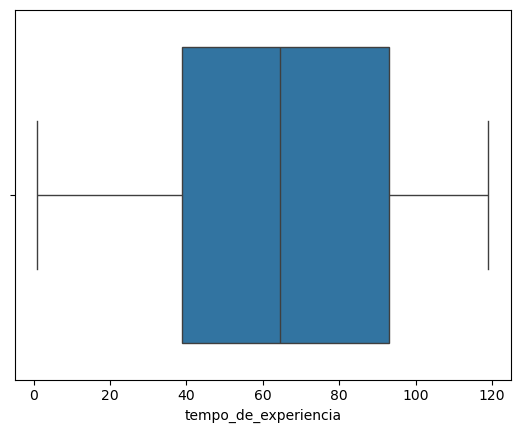

In [10]:
sns.boxplot(data=df_vendas_eda,x='tempo_de_experiencia')

<Axes: xlabel='numero_de_vendas'>

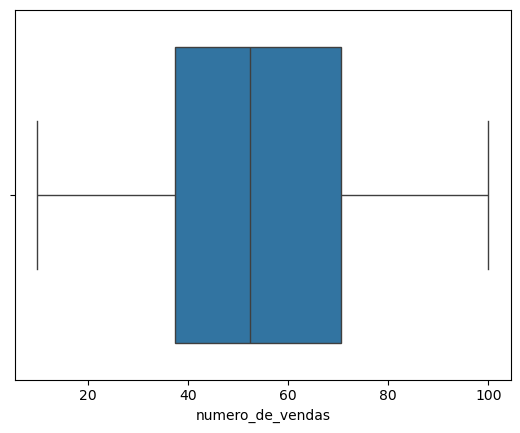

In [11]:
sns.boxplot(data=df_vendas_eda,x='numero_de_vendas')

<Axes: xlabel='fator_sazonal'>

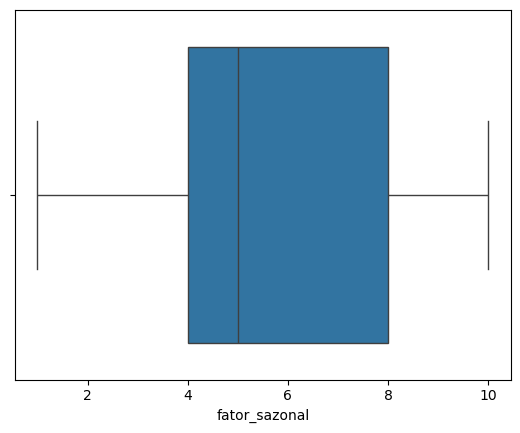

In [12]:
sns.boxplot(data=df_vendas_eda,x='fator_sazonal')

In [13]:
df_vendas_eda.isna().sum()

tempo_de_experiencia    0
numero_de_vendas        0
fator_sazonal           0
receita_em_reais        0
dtype: int64

<Axes: xlabel='tempo_de_experiencia', ylabel='receita_em_reais'>

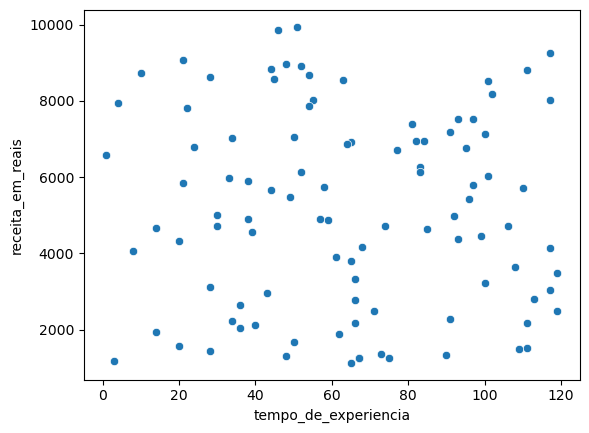

In [14]:
sns.scatterplot(data=df_vendas_eda,x='tempo_de_experiencia',y='receita_em_reais')

<Axes: xlabel='numero_de_vendas', ylabel='receita_em_reais'>

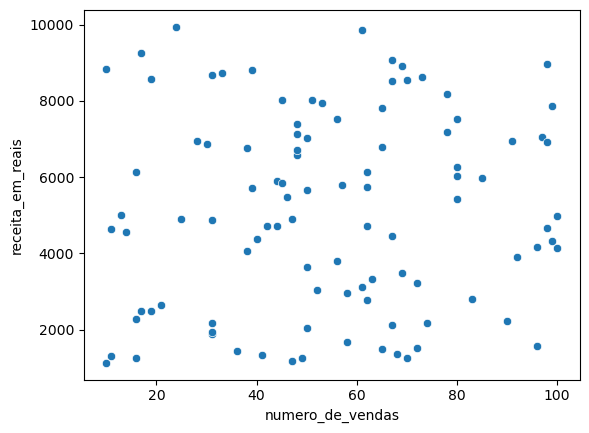

In [16]:
sns.scatterplot(data=df_vendas_eda,x='numero_de_vendas',y='receita_em_reais')

<Axes: xlabel='fator_sazonal', ylabel='receita_em_reais'>

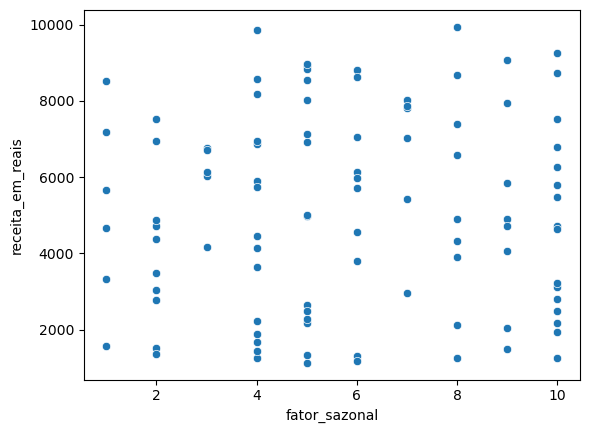

In [17]:
sns.scatterplot(data=df_vendas_eda,x='fator_sazonal',y='receita_em_reais')

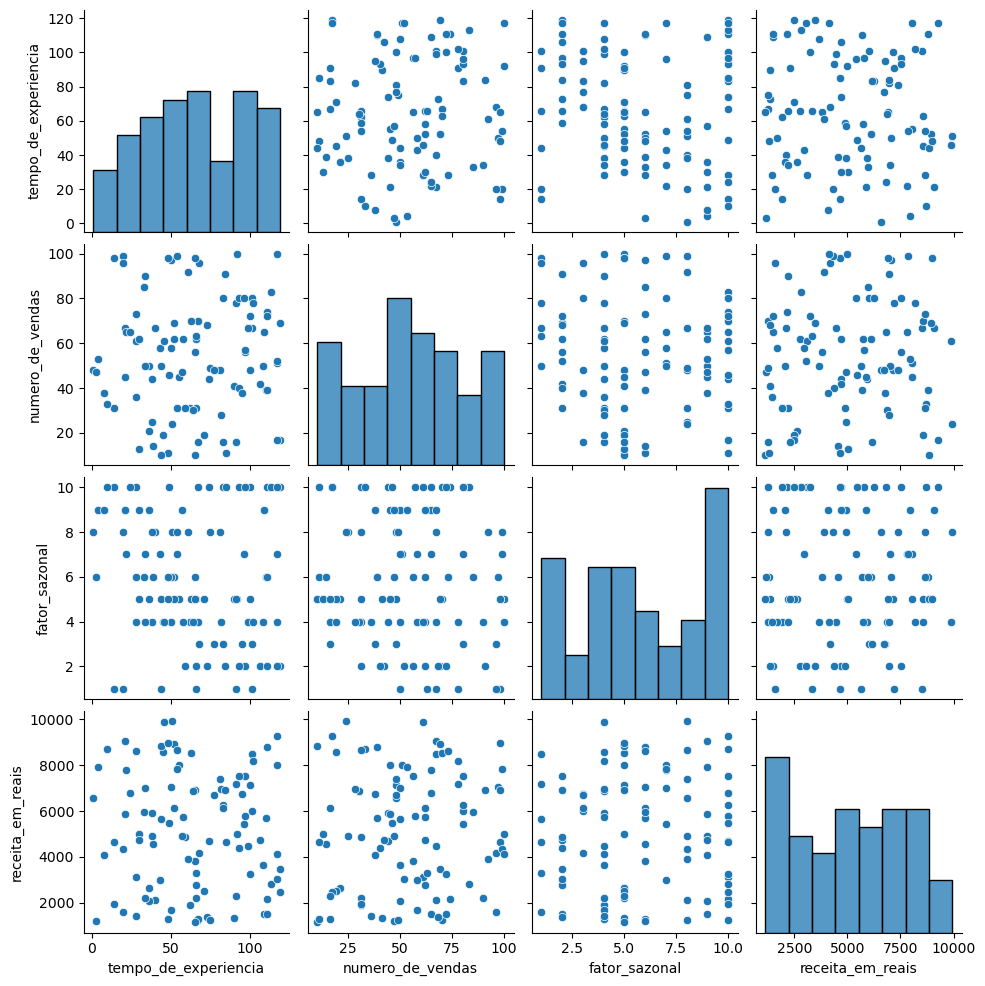

In [18]:
sns.pairplot(df_vendas_eda)

<Axes: >

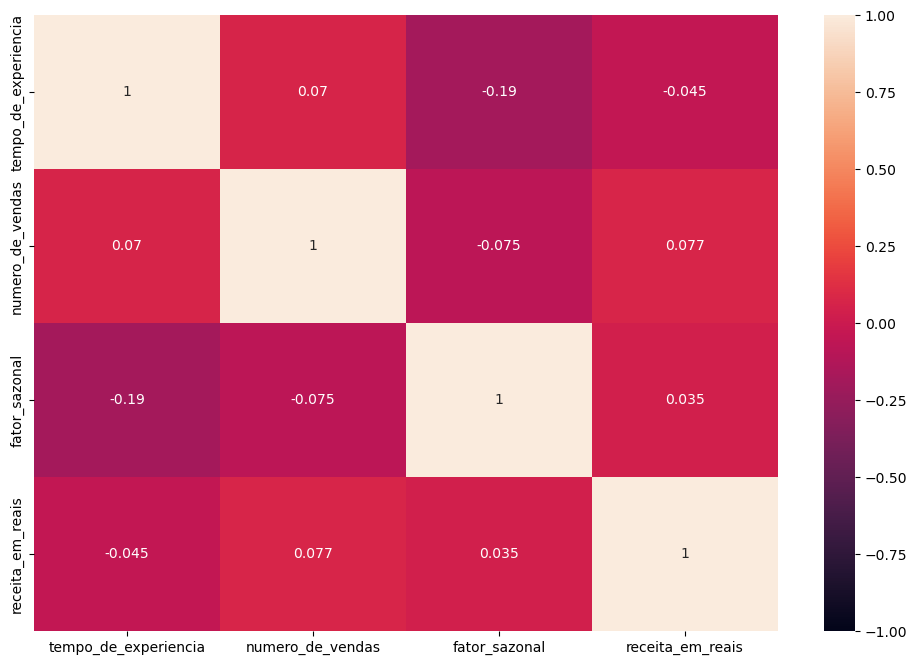

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df_vendas_eda.corr('spearman'),vmin=-1,vmax=1,annot=True)

<Axes: >

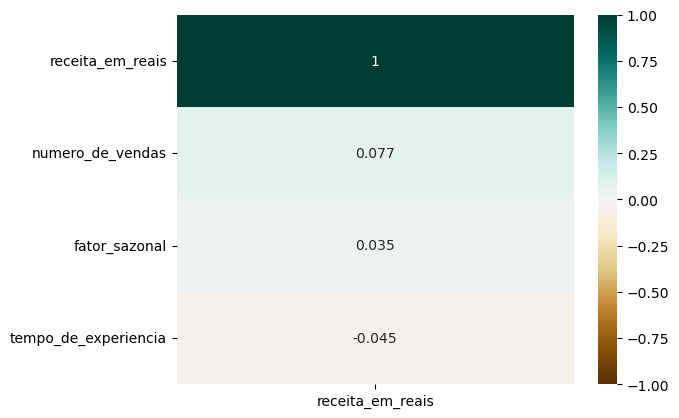

In [22]:
sns.heatmap(
    df_vendas_eda.corr('spearman')[['receita_em_reais']]
    .sort_values(by='receita_em_reais',ascending =False),vmin=-1,vmax=1,annot=True, cmap='BrBG'
)

In [23]:
df_vendas_eda.describe()

,tempo_de_experiencia,numero_de_vendas,fator_sazonal,receita_em_reais
count,100.000000,100.000000,100.000000,100.000000
mean,64.490000,54.490000,5.820000,5112.941924
std,32.397935,25.307201,2.836914,2544.731052
min,1.000000,10.000000,1.000000,1133.363948
25%,38.750000,37.500000,4.000000,2800.660516
50%,64.500000,52.500000,5.000000,4953.770034
75%,93.000000,70.500000,8.000000,7079.500163
max,119.000000,100.000000,10.000000,9941.016458


In [43]:
bins_tempo_de_experiencia = [0,10,20,30,40,50,60,70,80,90,100,110,120]
labels_tempo_de_experiencia = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69',
                               '70-79','80-89','90-99','100-109','110-119']

df_vendas_bucketing['escala_tempo_exp'] = pd.cut(df_vendas_bucketing['tempo_de_experiencia'],
                                             bins=bins_tempo_de_experiencia,
                                             labels=labels_tempo_de_experiencia, include_lowest=True)

In [45]:
df_vendas_bucketing.drop(columns='escala_tempo',inplace=True,axis=1)

In [46]:
df_vendas_bucketing.head(10)

,tempo_de_experiencia,numero_de_vendas,fator_sazonal,receita_em_reais,escala_tempo_exp
0,36,21,5,2639.886941,30-39
1,74,44,10,4707.322227,70-79
2,38,44,4,5910.035131,30-39
3,52,62,6,6130.742546,50-59
4,97,56,2,7516.457681,90-99
5,67,70,10,1247.882324,60-69
6,119,69,2,3485.606208,110-119
7,66,62,2,2773.987427,60-69
8,68,96,3,4177.919578,60-69
9,106,42,2,4719.691069,100-109


In [48]:
bins_numero_de_vendas = [10,20,30,40,50,60,70,80,90,100]
labels_numero_de_vendas = ['10-19','20-29','30-39','40-49','50-59','60-69',
                               '70-79','80-89','90-100']

df_vendas_bucketing['escala_tempo_vendas'] = pd.cut(df_vendas_bucketing['numero_de_vendas'],
                                             bins=bins_numero_de_vendas,
                                             labels=labels_numero_de_vendas, include_lowest=True)

In [49]:
df_vendas_bucketing.head(10)

,tempo_de_experiencia,numero_de_vendas,fator_sazonal,receita_em_reais,escala_tempo_exp,escala_tempo_vendas
0,36,21,5,2639.886941,30-39,20-29
1,74,44,10,4707.322227,70-79,40-49
2,38,44,4,5910.035131,30-39,40-49
3,52,62,6,6130.742546,50-59,60-69
4,97,56,2,7516.457681,90-99,50-59
5,67,70,10,1247.882324,60-69,60-69
6,119,69,2,3485.606208,110-119,60-69
7,66,62,2,2773.987427,60-69,60-69
8,68,96,3,4177.919578,60-69,90-100
9,106,42,2,4719.691069,100-109,40-49


<Axes: xlabel='escala_tempo_exp', ylabel='receita_em_reais'>

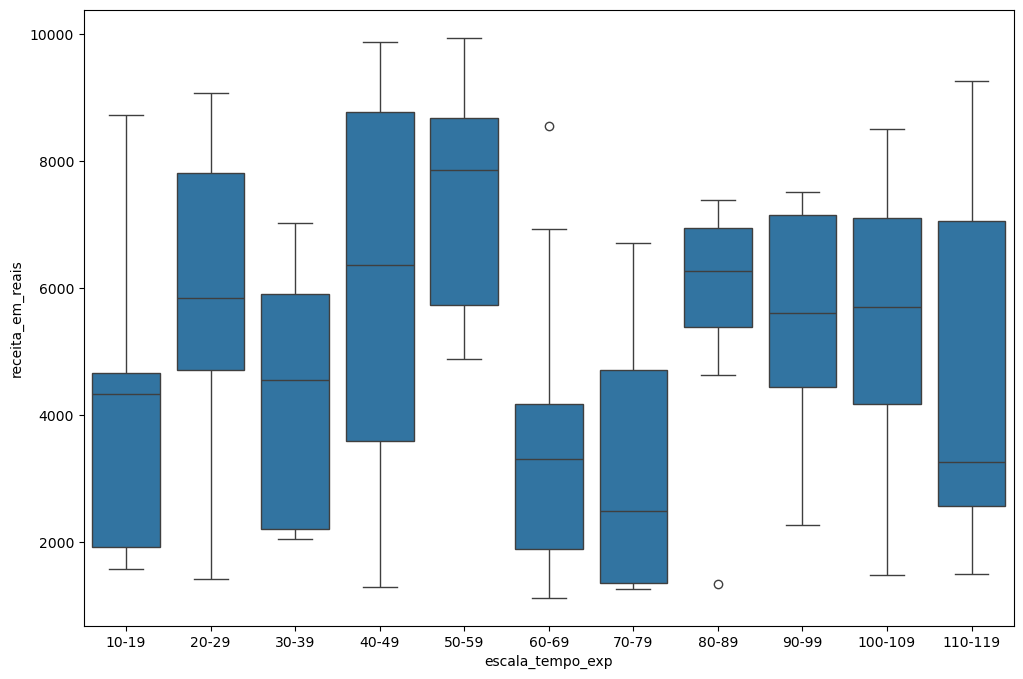

In [37]:
plt.figure(figsize=(12,8))
sns.boxplot(df_vendas_bucketing,x='escala_tempo_exp', y='receita_em_reais')

<Axes: xlabel='escala_tempo_vendas', ylabel='receita_em_reais'>

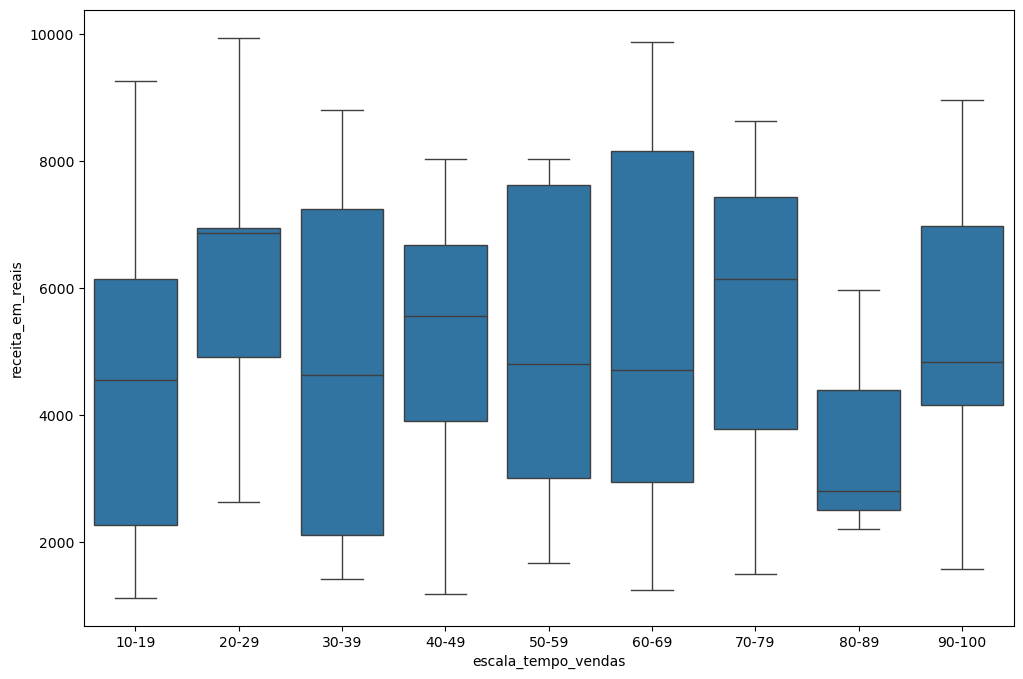

In [50]:
plt.figure(figsize=(12,8))
sns.boxplot(df_vendas_bucketing,x='escala_tempo_vendas', y='receita_em_reais')

## Treinar o modelo de Regressão Linear

In [51]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, root_mean_squared_error

In [52]:
X = df_vendas.drop(columns='receita_em_reais',axis=1)
y = df_vendas['receita_em_reais']

In [53]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [89]:
# Bloco de treinamento para o modelo

colunas_numericas = ['tempo_de_experiencia','numero_de_vendas','fator_sazonal']

# Transformer numéricas
transformer_numericas = Pipeline(
    steps=[
        ('scaler',StandardScaler())
    ]
)

# Criar um ColumnTransformer
preprocess = ColumnTransformer(
    transformers=[
        ('num',transformer_numericas,colunas_numericas)
    ]
)

# Criando o Pipeline principal = Pré- Processamento + treinamento
model_linear = Pipeline(
    steps=[
        ('preprocessor', preprocess),
        ('lin_model_reg', LinearRegression())
    ]
)

# Armazenar RMSE Treino e Teste (Para evitar overfitting)
rmse_scores_fold_train = []
rmse_scores_fold_test = []

# Armazenar R2 Score Teste 
r2score_fold_test = []

# Armazenar Resíduos
residuos = []

# Armazenar as predições
y_pred_total = []

# Já que o kf.split() retorna um conjunto de indices, podemos separar em treino e teste com uso do iloc
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Treine o conjunto de treinamento
    model_linear.fit(X_train, y_train)
    
    # Faça predições nos conjuntos de treinamento e teste
    y_train_pred = model_linear.predict(X_train)
    y_test_pred = model_linear.predict(X_test)
    y_pred_total.append(y_test_pred)
    
    # Calcule o RMSE para os conjuntos de treinamento e teste
    rmse_train = root_mean_squared_error(y_train,y_train_pred)
    rmse_test = root_mean_squared_error(y_test,y_test_pred)
    rmse_scores_fold_train.append(rmse_train)
    rmse_scores_fold_test.append(rmse_test)
    
    # Calcular o r2score
    r2score_test = r2_score(y_test,y_test_pred)
    r2score_fold_test.append(r2score_test)
    
    # Calcular os resíduos
    residuos_test = np.array(y_test - y_test_pred)
    residuos.append(residuos_test)

rmse_train_final = np.mean(rmse_scores_fold_train)
rmse_test_final = np.mean(rmse_scores_fold_test)
r2score_final = np.mean(r2score_fold_test)
percentual_rmse_final = ((rmse_test_final - rmse_train_final) / rmse_train_final) * 100

residuos = np.array(residuos).reshape(-1)
y_pred_total= np.array(y_pred_total).reshape(-1)

In [90]:
# Métricas 
print(f'RMSE Treino: {rmse_train_final}')
print(f'RMSE Test: {rmse_test_final}')
print(f'% Dif. RMSE Treino e Teste: {percentual_rmse_final}')
print(f'R2Score Teste: {r2score_final}')

RMSE Treino: 2496.705764221473
RMSE Test: 2685.8832854575785
% Dif. RMSE Treino e Teste: 7.57708513141896
R2Score Teste: -0.24028958262717012


## Análise de Resíduos - Modelo Linear

In [61]:
from scipy.stats import zscore

residuos_std = zscore(residuos)

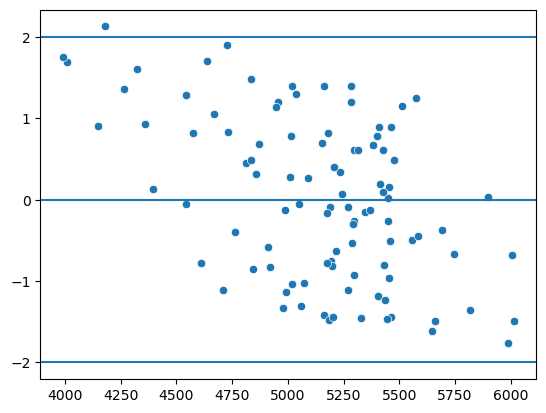

In [62]:
sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(0)
plt.axhline(-2)
plt.axhline(2)

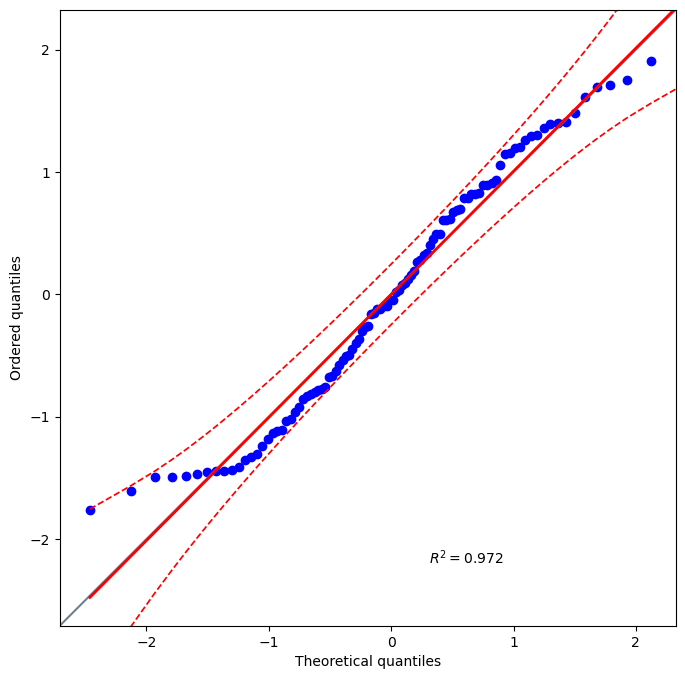

In [63]:
import pingouin as pg
plt.figure(figsize=(14,8))
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')
pg.qqplot(x=residuos_std,dist='norm',confidence=0.95)
plt.show()

In [64]:
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors

stat_shapiro, p_value_shapiro = shapiro(residuos_std)
print(f"Estatistica do Teste: {stat_shapiro} e p_value: {p_value_shapiro}")

Estatistica do Teste: 0.9646422719773848 e p_value: 0.0087359796841302


In [65]:
stat_ks, p_value_ks = kstest(residuos, 'norm')
print(f"Estatistica do Teste: {stat_ks} e p_value: {p_value_ks}")

Estatistica do Teste: 0.51 e p_value: 1.2007494929505019e-24


In [66]:
stat_ll, p_value_ll = lilliefors(residuos,'norm',pvalmethod='table')
print(f"Estatistica do Teste: {stat_ll} e p_value: {p_value_ll}")

Estatistica do Teste: 0.07404561452496072 e p_value: 0.2043620136046394


## Treinar modelo Polinomial

In [92]:
# graus_polynomial = [1,2,3,4,5,6,7,8,9,10]
graus_polynomial = [2] # O 2 teve o melhor resultado

rmse_train_values = []
rmse_test_values = []
percentual_rmse_values = []
r2score_test_values = []

kf = KFold(n_splits=5,shuffle=True,random_state=42)

for grau in graus_polynomial:


    #Pipeline 
    # Padronizar variáveis numéricas - tempo_na_empresa nivel_na_empresa
    colunas_numericas = ['tempo_de_experiencia','numero_de_vendas','fator_sazonal']

    # Transformer numéricas
    transformer_numericas = Pipeline(
        steps=[
            ('scaler',StandardScaler())
        ]
    )

    # Criar um ColumnTransformer
    preprocess = ColumnTransformer(
        transformers=[
            ('num',transformer_numericas,colunas_numericas)
        ]
    )

    #Criar features polinomiais
    feat_poly = PolynomialFeatures(degree=grau,include_bias=False)

    # Criando o Pipeline principal = Pré- Processamento + treinamento
    model_poly = Pipeline(
        steps=[
            ('preprocessor', preprocess),
            ('poly_features', feat_poly),
            ('lin_model_reg', LinearRegression())
        ]
    )

    # Armazenar RMSE Treino e Teste (Para evitar overfitting)
    rmse_scores_fold_train = []
    rmse_scores_fold_test = []

    # Armazenar R2 Score Teste 
    r2score_fold_test = []

    # Armazenar Resíduos
    residuos = []

    # Armazenar as predições
    y_pred_total = []

    # Já que o kf.split() retorna um conjunto de indices, podemos separar em treino e teste com uso do iloc
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Treine o conjunto de treinamento
        model_poly.fit(X_train, y_train)
        
        # Faça predições nos conjuntos de treinamento e teste
        y_train_pred = model_poly.predict(X_train)
        y_test_pred = model_poly.predict(X_test)
        y_pred_total.append(y_test_pred)
        
        # Calcule o RMSE para os conjuntos de treinamento e teste
        rmse_train = root_mean_squared_error(y_train,y_train_pred)
        rmse_test = root_mean_squared_error(y_test,y_test_pred)
        rmse_scores_fold_train.append(rmse_train)
        rmse_scores_fold_test.append(rmse_test)
        
        # Calcular o r2score
        r2score_test = r2_score(y_test,y_test_pred)
        r2score_fold_test.append(r2score_test)
        
        # Calcular os resíduos
        residuos_test = np.array(y_test - y_test_pred)
        residuos.append(residuos_test)

    rmse_train_final = np.mean(rmse_scores_fold_train)
    rmse_test_final = np.mean(rmse_scores_fold_test)
    r2score_final = np.mean(r2score_fold_test)
    percentual_rmse_final = ((rmse_test_final - rmse_train_final) / rmse_train_final) * 100

    residuos = np.array(residuos).reshape(-1)
    y_pred_total= np.array(y_pred_total).reshape(-1)

    rmse_train_values.append(rmse_train_final)
    rmse_test_values.append(rmse_test_final)
    r2score_test_values.append(r2score_final)
    percentual_rmse_values.append(percentual_rmse_final)



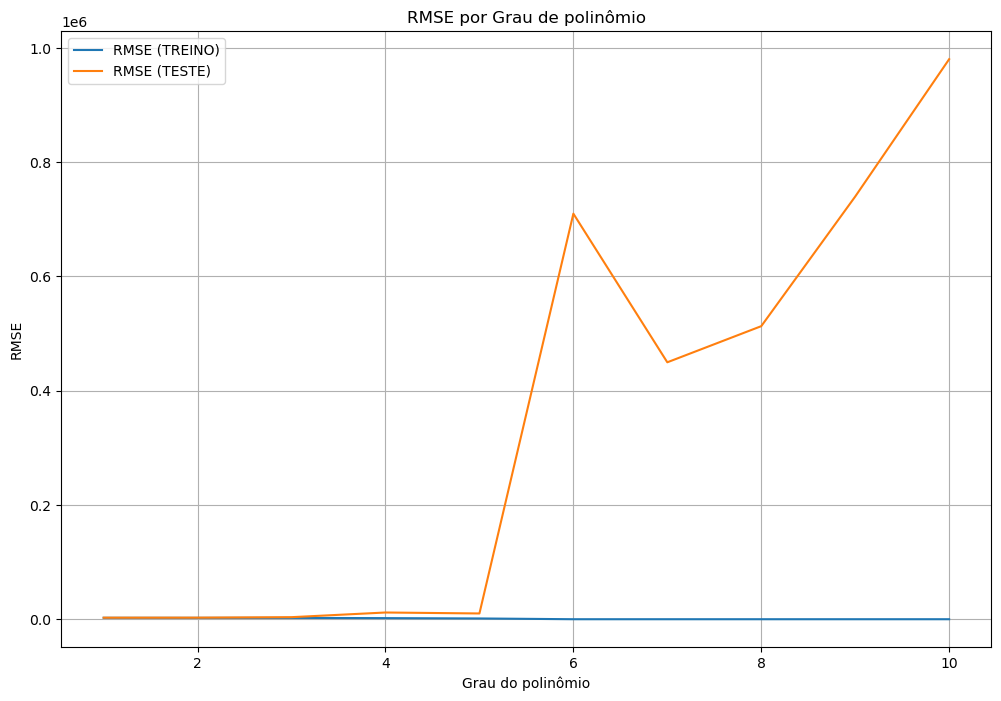

In [71]:
plt.figure(figsize=(12,8))
plt.plot(graus_polynomial, rmse_train_values, label='RMSE (TREINO)')
plt.plot(graus_polynomial, rmse_test_values, label='RMSE (TESTE)')
plt.xlabel('Grau do polinômio')
plt.ylabel('RMSE')
plt.title('RMSE por Grau de polinômio')
plt.legend()
plt.grid(True)
plt.show()

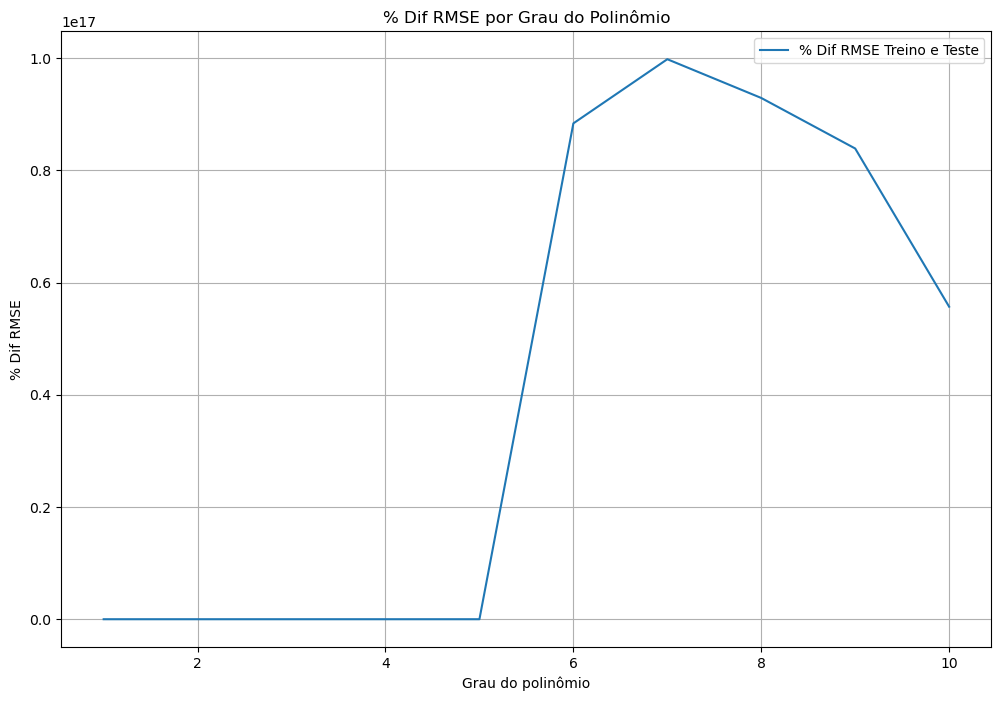

In [72]:
plt.figure(figsize=(12,8))
plt.plot(graus_polynomial, percentual_rmse_values, label='% Dif RMSE Treino e Teste')
plt.xlabel('Grau do polinômio')
plt.ylabel('% Dif RMSE')
plt.title('% Dif RMSE por Grau do Polinômio')
plt.legend()
plt.grid(True)
plt.show()

## Análise de Métricas do Modelo Polinomial

In [93]:
# Métricas
print(f'RMSE Treino: {rmse_train_final}')
print(f'RMSE Test: {rmse_test_final}')
print(f'% Dif. RMSE Treino e Teste: {percentual_rmse_final}')
print(f'R2Score Teste: {r2score_final}')


RMSE Treino: 2422.5172032157225
RMSE Test: 2740.6763430174005
% Dif. RMSE Treino e Teste: 13.133410956972524
R2Score Teste: -0.2944232033407833


In [94]:
from scipy.stats import zscore

residuos_std = zscore(residuos)

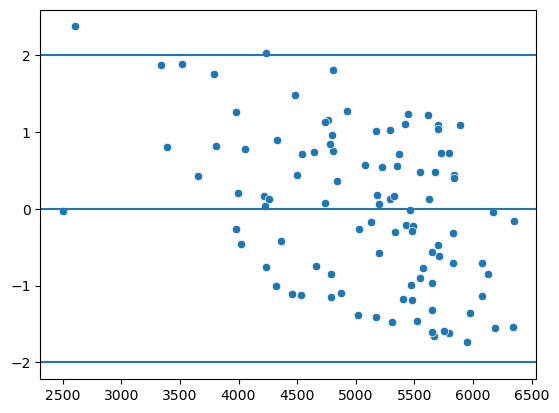

In [95]:
sns.scatterplot(x=y_pred_total, y=residuos_std)
plt.axhline(0)
plt.axhline(-2)
plt.axhline(2)

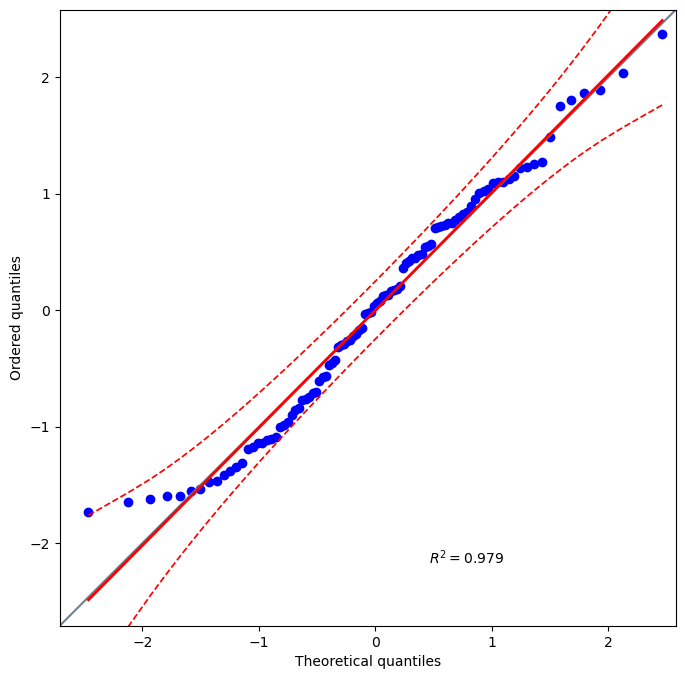

In [81]:
import pingouin as pg
plt.figure(figsize=(14,8))
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos na escala padrão')
pg.qqplot(x=residuos_std,dist='norm',confidence=0.95)
plt.show()


In [96]:
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors

stat_shapiro, p_value_shapiro = shapiro(residuos_std)
print(f"Estatistica do Teste: {stat_shapiro} e p_value: {p_value_shapiro}")

Estatistica do Teste: 0.9729703607500974 e p_value: 0.037472121399384196


In [97]:
stat_ks, p_value_ks = kstest(residuos, 'norm')
print(f"Estatistica do Teste: {stat_ks} e p_value: {p_value_ks}")

Estatistica do Teste: 0.52 e p_value: 1.1181550650648094e-25


In [98]:
stat_ll, p_value_ll = lilliefors(residuos,'norm',pvalmethod='table')
print(f"Estatistica do Teste: {stat_ll} e p_value: {p_value_ll}")

Estatistica do Teste: 0.06939434750387852 e p_value: 0.28050344617768


In [99]:
input_features = {
    'tempo_de_experiencia': 72,	
    'numero_de_vendas': 98,	
    'fator_sazonal':10,
}

pred_df = pd.DataFrame(input_features, index=[1])

In [100]:
model_poly.predict(pred_df)

array([4694.79202671])

In [101]:
import joblib

In [102]:
joblib.dump(model_poly,'./modelo_vendas.pkl')

['./modelo_vendas.pkl']